Importing relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import pearsonr
from nlcor import nlcor
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
SRC_PATH = 'src'
DATA_PATH = 'output_endocytosis/plots_data'
SAVE_PATH = 'output_endocytosis/figures'
INTERVAL = 0.1
FILENAME_PREFIX = "20240216_"

In [3]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [4]:
endo_0_001 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=0.001'):
    for file in files:
        endo_0_001.append(file)

endo_0_01 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=0.01'):
    for file in files:
        endo_0_01.append(file)

endo_0_067 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=0.067'):
    for file in files:
        endo_0_067.append(file)

endo_0_1 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=0.1'):
    for file in files:
        endo_0_1.append(file)

endo_1_0 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=1.0'):
    for file in files:
        endo_1_0.append(file)

endo_10_0 = []
for subdir, dirs, files in os.walk(f'{DATA_PATH}/endo=10.0'):
    for file in files:
        endo_10_0.append(file)

In [5]:
endo_0_01

['endocytosis=0.01_iteration1.csv',
 'endocytosis=0.01_iteration2.csv',
 'endocytosis=0.01_iteration3.csv',
 'endocytosis=0.01_iteration4.csv',
 'endocytosis=0.01_iteration5.csv']

In [6]:
data_endo_0_001 = []
for i in endo_0_001:
    data = pd.read_csv(f'{DATA_PATH}/endo=0.001/{i}')
    data = data[data['timestep'] == 160]
    data_endo_0_001.append(data)
    print(f'info processing {i}')

data_endo_0_001 = pd.concat(data_endo_0_001)

data_endo_0_01 = []
for i in endo_0_01:
    data = pd.read_csv(f'{DATA_PATH}/endo=0.01/{i}', encoding='unicode_escape')
    data = data[data['timestep'] == 160]
    data_endo_0_01.append(data)
    print(f'info processing {i}')

data_endo_0_01 = pd.concat(data_endo_0_01)

data_endo_0_067 = []
for i in endo_0_067:
    data = pd.read_csv(f'{DATA_PATH}/endo=0.067/{i}')
    data = data[data['timestep'] == 160]
    data_endo_0_067.append(data)
    print(f'info processing {i}')

data_endo_0_067 = pd.concat(data_endo_0_067)

data_endo_0_1 = []
for i in endo_0_1:
    data = pd.read_csv(f'{DATA_PATH}/endo=0.1/{i}')
    data = data[data['timestep'] == 160]
    data_endo_0_1.append(data)
    print(f'info processing {i}')

data_endo_0_1 = pd.concat(data_endo_0_1)

data_endo_1_0 = []
for i in endo_1_0:
    data = pd.read_csv(f'{DATA_PATH}/endo=1.0/{i}')
    data = data[data['timestep'] == 160]
    data_endo_1_0.append(data)
    print(f'info processing {i}')

data_endo_1_0 = pd.concat(data_endo_1_0)

data_endo_10_0 = []
for i in endo_10_0:
    data = pd.read_csv(f'{DATA_PATH}/endo=10.0/{i}')
    data = data[data['timestep'] == 160]
    data_endo_10_0.append(data)
    print(f'info processing {i}')

data_endo_10_0 = pd.concat(data_endo_10_0)

print('DONE!')

info processing endocytosis=0.001_iteration1.csv
info processing endocytosis=0.001_iteration2.csv
info processing endocytosis=0.001_iteration3.csv
info processing endocytosis=0.001_iteration4.csv
info processing endocytosis=0.001_iteration5.csv
info processing endocytosis=0.01_iteration1.csv
info processing endocytosis=0.01_iteration2.csv
info processing endocytosis=0.01_iteration3.csv
info processing endocytosis=0.01_iteration4.csv
info processing endocytosis=0.01_iteration5.csv
info processing endocytosis=0.067_iteration4.csv
info processing endocytosis=0.067_iteration5.csv
info processing endocytosis=0.067_iteration2.csv
info processing endocytosis=0.067_iteration3.csv
info processing endocytosis=0.067_iteration1.csv
info processing endocytosis=0.1_iteration3.csv
info processing endocytosis=0.1_iteration2.csv
info processing endocytosis=0.1_iteration1.csv
info processing endocytosis=0.1_iteration5.csv
info processing endocytosis=0.1_iteration4.csv
info processing endocytosis=1.0_ite

In [7]:
data_endo_0_001

,Unnamed: 0,timestep,1,2,3,4,5,6,7,8,...,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2
1599,1599,160.0,3862,3858,3865,3937,3915.0,3965,0.0,0.0,...,8.0,7.0,0.0,12359.0,5876.0,0.0,0.0,0.0,0.0,0.0
1599,1599,160.0,3734,3916,3844,3951,3807.0,3816,0.0,0.0,...,86.0,11.0,0.0,7876.0,12004.0,0.0,0.0,0.0,0.0,0.0
1599,1599,160.0,3772,3940,3891,3892,3860.0,3826,0.0,0.0,...,1698.0,9.0,2.0,10396.0,11587.0,0.0,0.0,0.0,0.0,0.0
1599,1599,160.0,3873,3857,3827,3763,3843.0,3912,0.0,0.0,...,502.0,19.0,3.0,2890.0,9563.0,0.0,0.0,0.0,0.0,0.0
1599,1599,160.0,4028,3850,3913,3889,3803.0,3688,0.0,0.0,...,4275.0,12.0,4.0,6592.0,7873.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(data_endo_0_001.shape)
print(data_endo_0_01.shape)
print(data_endo_0_067.shape)
print(data_endo_0_1.shape)
print(data_endo_1_0.shape)
print(data_endo_10_0.shape)

(5, 62)
(5, 62)
(5, 62)
(5, 62)
(5, 62)
(5, 62)


In [9]:
data_endo_0_001.insert(1, 'theta', [0.001, 0.001, 0.001, 0.001, 0.001])
data_endo_0_01.insert(1, 'theta', [0.01, 0.01, 0.01, 0.01, 0.01])
data_endo_0_067.insert(1, 'theta', [0.067,0.067, 0.067, 0.067, 0.067])
data_endo_0_1.insert(1, 'theta', [0.1, 0.1, 0.1, 0.1, 0.1])
data_endo_1_0.insert(1, 'theta', [1.0, 1.0, 1.0, 1.0, 1.0])
data_endo_10_0.insert(1, 'theta', [10.0, 10.0, 10.0, 10.0, 10.0])

In [10]:
all_plots = pd.concat([data_endo_0_001, data_endo_0_01, data_endo_0_067, data_endo_0_1, data_endo_1_0, data_endo_10_0])

In [11]:
all_plots

,Unnamed: 0,theta,timestep,1,2,3,4,5,6,7,...,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2
1599,1599,0.001,160.0,3862.0,3858.0,3865.0,3937.0,3915.0,3965.0,0.0,...,8.0,7.0,0.0,12359.0,5876.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.001,160.0,3734.0,3916.0,3844.0,3951.0,3807.0,3816.0,0.0,...,86.0,11.0,0.0,7876.0,12004.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.001,160.0,3772.0,3940.0,3891.0,3892.0,3860.0,3826.0,0.0,...,1698.0,9.0,2.0,10396.0,11587.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.001,160.0,3873.0,3857.0,3827.0,3763.0,3843.0,3912.0,0.0,...,502.0,19.0,3.0,2890.0,9563.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.001,160.0,4028.0,3850.0,3913.0,3889.0,3803.0,3688.0,0.0,...,4275.0,12.0,4.0,6592.0,7873.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.010,160.0,3841.0,3750.0,3748.0,3801.0,3731.0,3869.0,0.0,...,2952.0,3.0,0.0,5373.0,4182.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.010,160.0,3780.0,3771.0,3825.0,3792.0,3780.0,3755.0,0.0,...,1883.0,6.0,0.0,3555.0,4926.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.010,160.0,3748.0,3772.0,3899.0,3858.0,3927.0,3820.0,0.0,...,1.0,17.0,3.0,3853.0,5481.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.010,160.0,3788.0,3833.0,3864.0,3843.0,3849.0,3880.0,0.0,...,2.0,15.0,6.0,4154.0,6093.0,0.0,0.0,0.0,0.0,0.0
1599,1599,0.010,160.0,3773.0,3906.0,3818.0,3825.0,3813.0,3759.0,0.0,...,2063.0,10.0,0.0,2849.0,4554.0,0.0,0.0,0.0,0.0,0.0


In [12]:
thetas = [0.001, 0.01, 0.067, 0.1, 1.0, 10.0]
HFRR_mean = []
HFRR_std = []
all_points = []

for theta in thetas:
    mean_theta = all_plots[all_plots['theta'] == theta]
    HFRR_mean.append(np.mean(mean_theta['15']))
    HFRR_std.append(np.std(mean_theta['15']))
    all_points.append(mean_theta)

In [13]:
HFRR_std

[2232.8807402098305,
 254.71788315703316,
 205.42112841672346,
 61.052764065192,
 10.526157893552615,
 0.4000000000000001]

/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


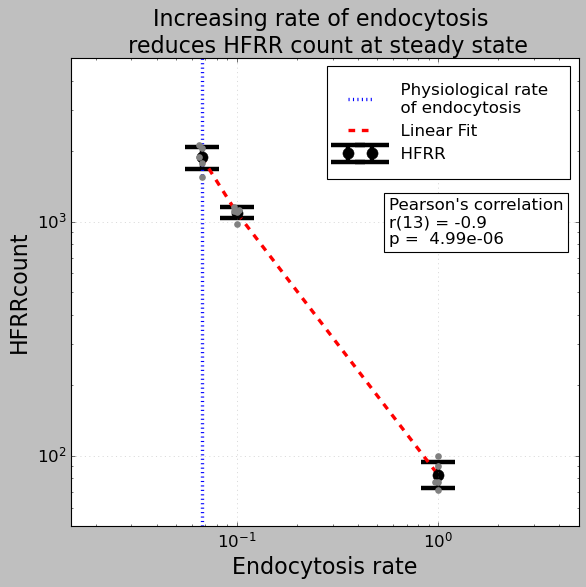

In [24]:
cmap = plt.colormaps['viridis']
viridis = cmap(np.linspace(0,1, 10))

plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.errorbar(thetas[2:5], HFRR_mean[2:5], yerr=HFRR_std[2:5], fmt='o', ms=10, label='  HFRR', capsize=15, alpha=1, color='black', elinewidth=4, capthick=4, markeredgecolor='black')
sns.swarmplot(data=all_plots[10:25], x='theta', y='15', native_scale=True, size=6, color='grey')


plt.xlabel('Endocytosis rate', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('HFRRcount', fontsize=20)
plt.grid(color='grey', alpha=0.5)
plt.title('Increasing rate of endocytosis \n reduces HFRR count at steady state', fontsize=20)
plt.axvline(x=0.067, color='b', linestyle=':', lw=3, label="  Physiological rate \n  of endocytosis")
plt.xlim(0.015, 5) 
plt.ylim(50, 5000)


x=pearsonr(all_plots[10:25]["theta"], all_plots[10:25]["15"])
p_stat = x[0]
p_val = x[1]
plt.text(x=0.57, y=800, s=f"Pearson's correlation\nr(13) = {p_stat: .2} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)

x_fit = all_plots[10:25]["theta"]
coefficients = np.polyfit(x_fit, all_plots[10:25]["15"], 2)
poly = np.poly1d(coefficients)
y_fit = poly(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=3, label='  Linear Fit')

plt.legend(bbox_to_anchor=(1,1), borderpad=1, fontsize=15)
plt.tight_layout()
plt.savefig('output_endocytosis/figures/theta_vs_HFRR.png')


In [63]:
endocytosis_0001 = pd.read_csv('output_endocytosis/plots_data/endo=0.001/endocytosis=0.001_iteration2.csv')
endocytosis_001 = pd.read_csv('output_endocytosis/plots_data/endo=0.01/endocytosis=0.01_iteration2.csv')
endocytosis_0067 = pd.read_csv('output_endocytosis/plots_data/endo=0.067/endocytosis=0.067_iteration2.csv')
endocytosis_01 = pd.read_csv('output_endocytosis/plots_data/endo=0.1/endocytosis=0.1_iteration2.csv')
endocytosis_10 = pd.read_csv('output_endocytosis/plots_data/endo=1.0/endocytosis=1.0_iteration2.csv')
endocytosis_100 = pd.read_csv('output_endocytosis/plots_data/endo=10.0/endocytosis=10.0_iteration2.csv')

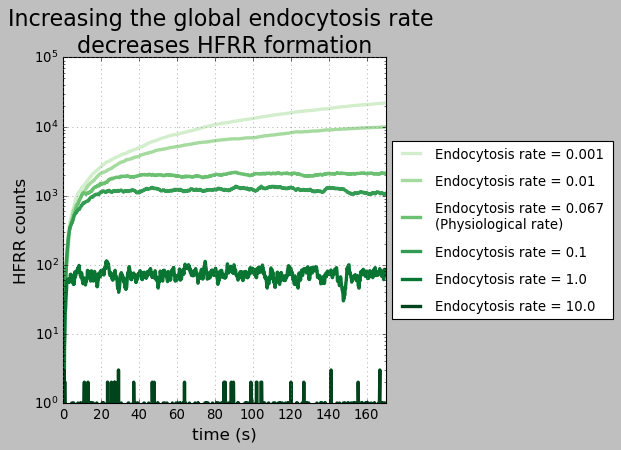

In [91]:
cmap = plt.colormaps['Greens']
viridis = cmap(np.linspace(0.2,1, 6))

fig = plt.figure()
ax = plt.subplot(111)

plt.style.use('classic')
plt.plot(endocytosis_0001['timestep'], endocytosis_0001['15'], label='Endocytosis rate = 0.001', color=viridis[0], lw=3)
plt.plot(endocytosis_001['timestep'], endocytosis_001['15'], label='Endocytosis rate = 0.01', color=viridis[1], lw=3)
plt.plot(endocytosis_0067['timestep'], endocytosis_0067['15'], label='Endocytosis rate = 0.067 \n(Physiological rate)', color=viridis[2], lw=3)
plt.plot(endocytosis_01['timestep'], endocytosis_01['15'], label='Endocytosis rate = 0.1', color=viridis[3], lw=3)
plt.plot(endocytosis_10['timestep'], endocytosis_10['15'], label='Endocytosis rate = 1.0', color=viridis[4], lw=3)
plt.plot(endocytosis_100['timestep'], endocytosis_100['15'], label='Endocytosis rate = 10.0', color=viridis[5], lw=3)
plt.xlim(0, 170)
# plt.ylim(0, 2600)
plt.yscale('log')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.65, box.height*0.9])
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='12', labelspacing=1)
plt.xlabel('time (s)', fontsize=15)
plt.ylabel('HFRR counts', fontsize=15)
plt.grid(color='grey')
plt.title('Increasing the global endocytosis rate \ndecreases HFRR formation', fontsize=20, x=0.5)
plt.savefig('output_endocytosis/figures/endocytosis_HFRR_vs_time.png')